# Asg-4 imports 


In [136]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Question 1: 
 

Prove that this language is not regular 

$L_{if} = \{ a^i b^j c^k \;:\; i,j,k\ge 0,\; {\rm and}\; {\rm if}\; (i=2)\; {\rm then}\; (j=k)  \}$

Hint: Consider the reverse of $L_{if}$ calling it the language $LR_{if}$, prove that $LR_{if}$ is non-regular using the Pumping Lemma. Then, justify why this means that $L_{if}$ is non-regular.




```
# This is formatted as code
```

- Answer: 

  $LR_{if} = \{ c^k b^j a^i \;:\; i,j,k\ge 0,\; {\rm and}\; {\rm if}\; (i=2)\; {\rm then}\; (j=k)  \}$

  $w = xy^iz =  ccbbaa$ 
  
  c  c  bbaa 
  
  c bbaa not in $LR_{if}$

  c cc bbaa not in $LR_{if}$

  c ccc bbaa not in $LR_{if}$

  Since When L is regular than rev(L) is also regular, and
  When L is non-regular than rev(L) is also non-regular. Thus, prooving $LR_{if}$ is non-regular means $L_{if} non-regular

## Question 2:

Prove that language $Add$ is not regular 

Add = {x = y + z where x, y, and z are binary numbers and the addition yields correct result}
          
More examples of strings in the language $Add$ are below:

* String s1 = "$101=10+11$" 

* String s2 = "$1000 = 100 + 100$"

* String s3 = "$1011 = 110 + 101$"

- Answer:

$w=xy^iz$

For the case String s1

1 01=10+11

1      =10+11 not in $Add$

1 0101 =10+11 not in $Add$

## Question 3:

Design a PDA called "a2b" for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; j = 2i \}$.
- Some strings in such language are: $abb$, $aabbbb$, $aaabbbbbb$, etc.
- Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy. For example:
  - !! The PDA uses the stack in THIS WAY while a's arrive
  - !! Then when b's arrive, the PDA does THIS
  - !! After b's, if $a$'s arrive, the PDA does THIS
- After that, fully document your design (line by line)
- Then, test your PDA on these strings
  1. $\varepsilon$ (accept)

  2. $abb$ (accept)

  3. $aabbbb$ (accept)

  4. $aaabbbbbb$ (accept)

  5. $ab$ (reject)

  6. $b$ (reject)

  7. $aba$ (reject)

  8. $abba$ (reject)
- Finally, add two more accepting and two more rejecting tests of your own.

### Given test cases:

In [137]:
a2b = md2mc('''
PDA

!! Overall Algorithm:
!! ...a few more points
!! The PDA uses the stack in storing doubled as
!! Then when b's arrive, the PDA triggers stack pops a up
!! After b's, if  𝑎 's arrive, the PDA does nothing, and it results this PDA rejecting the string.

!! Now a line-by-line description
I   : '', # ; # ->  F     !! In case the input string is empty,
                          !! we satisfy acceptance trivially; move into F state
I   : a, #  ; aa# -> I    !! a is stacked twice
I   : a, a  ; aaa -> I    !! a is stacked twice
I   : b, a  ; ''  -> POP  !! b starts and pop a
POP : '', # ; #   -> F    !! for string 'a'
POP : b, a  ; ''  -> POP  !! pop a
''')

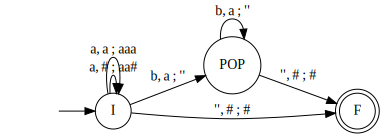

In [138]:
dotObj_pda(a2b)

In [139]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('F', '', '#') .


In [140]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abb', '#')
->  ('I', 'bb', 'aa#')
->  ('POP', 'b', 'a#')
->  ('POP', '', '#')
->  ('F', '', '#') .


In [141]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbb', '#')
->  ('I', 'abbbb', 'aa#')
->  ('I', 'bbbb', 'aaaa#')
->  ('POP', 'bbb', 'aaa#')
->  ('POP', 'bb', 'aa#')
->  ('POP', 'b', 'a#')
->  ('POP', '', '#')
->  ('F', '', '#') .


In [142]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabbbbbb', '#')
->  ('I', 'aabbbbbb', 'aa#')
->  ('I', 'abbbbbb', 'aaaa#')
->  ('I', 'bbbbbb', 'aaaaaa#')
->  ('POP', 'bbbbb', 'aaaaa#')
->  ('POP', 'bbbb', 'aaaa#')
->  ('POP', 'bbb', 'aaa#')
->  ('POP', 'bb', 'aa#')
->  ('POP', 'b', 'a#')
->  ('POP', '', '#')
->  ('F', '', '#') .


In [143]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('I', 'b', 'aa#'), ('POP', '', 'a#'), ('I', 'ab', '#'), ('F', 'ab', '#')}


In [144]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('F', 'b', '#'), ('I', 'b', '#')}


In [145]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('POP', 'a', 'a#'), ('I', 'ba', 'aa#'), ('I', 'aba', '#'), ('F', 'aba', '#')}


In [146]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('F', 'abba', '#'), ('POP', 'a', '#'), ('I', 'abba', '#'), ('POP', 'ba', 'a#'), ('F', 'a', '#'), ('I', 'bba', 'aa#')}


### Add your own test cases here:

In [147]:
explore_pda('aaaaabbbbbbbbbb', a2b)

String aaaaabbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaaabbbbbbbbbb', '#')
->  ('I', 'aaaabbbbbbbbbb', 'aa#')
->  ('I', 'aaabbbbbbbbbb', 'aaaa#')
->  ('I', 'aabbbbbbbbbb', 'aaaaaa#')
->  ('I', 'abbbbbbbbbb', 'aaaaaaaa#')
->  ('I', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('POP', 'bbbbbbbbb', 'aaaaaaaaa#')
->  ('POP', 'bbbbbbbb', 'aaaaaaaa#')
->  ('POP', 'bbbbbbb', 'aaaaaaa#')
->  ('POP', 'bbbbbb', 'aaaaaa#')
->  ('POP', 'bbbbb', 'aaaaa#')
->  ('POP', 'bbbb', 'aaaa#')
->  ('POP', 'bbb', 'aaa#')
->  ('POP', 'bb', 'aa#')
->  ('POP', 'b', 'a#')
->  ('POP', '', '#')
->  ('F', '', '#') .


In [148]:
explore_pda('aaaaaabbbbbbbbbbbb', a2b)

String aaaaaabbbbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaaaabbbbbbbbbbbb', '#')
->  ('I', 'aaaaabbbbbbbbbbbb', 'aa#')
->  ('I', 'aaaabbbbbbbbbbbb', 'aaaa#')
->  ('I', 'aaabbbbbbbbbbbb', 'aaaaaa#')
->  ('I', 'aabbbbbbbbbbbb', 'aaaaaaaa#')
->  ('I', 'abbbbbbbbbbbb', 'aaaaaaaaaa#')
->  ('I', 'bbbbbbbbbbbb', 'aaaaaaaaaaaa#')
->  ('POP', 'bbbbbbbbbbb', 'aaaaaaaaaaa#')
->  ('POP', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('POP', 'bbbbbbbbb', 'aaaaaaaaa#')
->  ('POP', 'bbbbbbbb', 'aaaaaaaa#')
->  ('POP', 'bbbbbbb', 'aaaaaaa#')
->  ('POP', 'bbbbbb', 'aaaaaa#')
->  ('POP', 'bbbbb', 'aaaaa#')
->  ('POP', 'bbbb', 'aaaa#')
->  ('POP', 'bbb', 'aaa#')
->  ('POP', 'bb', 'aa#')
->  ('POP', 'b', 'a#')
->  ('POP', '', '#')
->  ('F', '', '#') .


In [149]:
explore_pda('aabb', a2b)

String aabb rejected by your PDA :-(
Visited states are:
{('F', 'aabb', '#'), ('I', 'bb', 'aaaa#'), ('POP', 'b', 'aaa#'), ('I', 'aabb', '#'), ('POP', '', 'aa#'), ('I', 'abb', 'aa#')}


In [150]:
explore_pda('abab', a2b)

String abab rejected by your PDA :-(
Visited states are:
{('I', 'bab', 'aa#'), ('I', 'abab', '#'), ('F', 'abab', '#'), ('POP', 'ab', 'a#')}


## Question 4:

Design a PDA for language Lif in question 1. 

- Hint: when a = 2, the PDA matches b's and c's (using the stack for this match). Else, it only checks their order of arrival (and simply ignores the stack).
- Test your PDA on these strings:
  - aabbbccc   (accept)
  - aabbbbcccc (accept)
  - aa         (accept)
  - abbbcccc (accept)
  - aaabbc   (accept)
  - Epsilon    (accept, as there are zero a's)
  - abbcc    (accept, as there is no constraint to not match b's and c's if two a's)
  - cb        (reject)
  - aabbcca (reject)
  - abba     (reject)
  - ccac       (reject)
  - abba       (reject)
  - baac       (reject)
  - ac         (accept)
- Then add three more accepting test cases and three more rejecting test cases. Document the tests saying why they must pass/fail

In [151]:
#𝐿𝑖𝑓={𝑎𝑖𝑏𝑗𝑐𝑘:𝑖,𝑗,𝑘≥0,andif(𝑖=2)then(𝑗=𝑘)}
Lif = md2mc('''
PDA

!! Overall Algorithm
!! This PDA uses stack to check the numbers of bs and cs are same when there are 2 as.
!! more specifically b is only stacked and c triggers the stacked bs to pop,
!! and after this, if # is TOS that means there are same number of bs and cs
!! otherwise the stack stays empty or ignored and, the flow of its states prevents accepting mixed combination of a, b and cs. such as ace

!! ... Now a line-by-line description
I       : '', #   ; #   ->  F         !! In case the input string is empty,
                                      !! we satisfy acceptance trivially; move into F state
I       : a, #    ; a#  -> I          !! ingest first a
I       : a, a    ; ''  -> Push_Bs    !! second a makes 2 brances to face 2 as case and NEXT LINE
I       : '', ''  ; ''  -> As         !! face other than 2 as case
As      : a, #    ; #   -> As         !! ingest a
As      : b, ''   ; ''  -> Bs         !! a ends and b begins
As      : c, ''   ; ''  -> Cs         !! a ends and c begins
As      : '', ''  ; ''  -> F          !! end of string
Push_Bs : b, ''   ; b   -> Push_Bs    !! b input when b is TOS turns into b stacked
Push_Bs : c, b    ; ''  -> Pop_Bs     !! c input after Bs end cancels B
Pop_Bs  : c, b    ; ''  -> Pop_Bs     !! c input followed by c cancels B in the stack
Pop_Bs  : '', #   ; #   -> F          !! '' and # is TOS mean there were same number of Bs and Cs
Bs      : b, ''   ; ''  -> Bs         !! ingest b
Bs      : c, ''   ; ''  -> Cs         !! b ends and c begins
Bs      : '', ''  ; ''  -> F          !! end of string
Cs      : c, ''   ; ''  -> Cs         !! ingest c
Cs      : '', ''  ; ''  -> F          !! end of string

''')

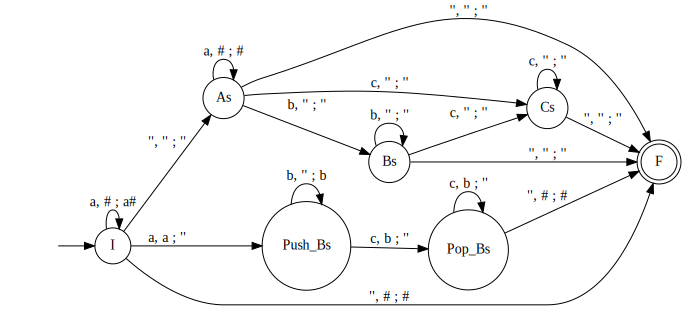

In [152]:
dotObj_pda(Lif)

### Given test cases:

* aa bbb ccc   (accept)

In [153]:
explore_pda('aabbbccc', Lif)

String aabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbccc', '#')
->  ('I', 'abbbccc', 'a#')
->  ('Push_Bs', 'bbbccc', '#')
->  ('Push_Bs', 'bbccc', 'b#')
->  ('Push_Bs', 'bccc', 'bb#')
->  ('Push_Bs', 'ccc', 'bbb#')
->  ('Pop_Bs', 'cc', 'bb#')
->  ('Pop_Bs', 'c', 'b#')
->  ('Pop_Bs', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbccc', '#')
->  ('As', 'aabbbccc', '#')
->  ('As', 'abbbccc', '#')
->  ('As', 'bbbccc', '#')
->  ('Bs', 'bbccc', '#')
->  ('Bs', 'bccc', '#')
->  ('Bs', 'ccc', '#')
->  ('Cs', 'cc', '#')
->  ('Cs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


* aa bbbb cccc (accept)
 

In [154]:
explore_pda('aabbbbcccc', Lif)

String aabbbbcccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbbcccc', '#')
->  ('I', 'abbbbcccc', 'a#')
->  ('Push_Bs', 'bbbbcccc', '#')
->  ('Push_Bs', 'bbbcccc', 'b#')
->  ('Push_Bs', 'bbcccc', 'bb#')
->  ('Push_Bs', 'bcccc', 'bbb#')
->  ('Push_Bs', 'cccc', 'bbbb#')
->  ('Pop_Bs', 'ccc', 'bbb#')
->  ('Pop_Bs', 'cc', 'bb#')
->  ('Pop_Bs', 'c', 'b#')
->  ('Pop_Bs', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbbcccc', '#')
->  ('As', 'aabbbbcccc', '#')
->  ('As', 'abbbbcccc', '#')
->  ('As', 'bbbbcccc', '#')
->  ('Bs', 'bbbcccc', '#')
->  ('Bs', 'bbcccc', '#')
->  ('Bs', 'bcccc', '#')
->  ('Bs', 'cccc', '#')
->  ('Cs', 'ccc', '#')
->  ('Cs', 'cc', '#')
->  ('Cs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


* aa         (accept)

In [155]:
explore_pda('aa', Lif)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aa', '#')
->  ('As', 'aa', '#')
->  ('As', 'a', '#')
->  ('As', '', '#')
->  ('F', '', '#') .


* a bbb cccc (accept)

In [156]:
explore_pda('abbbcccc', Lif)

String abbbcccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abbbcccc', '#')
->  ('As', 'abbbcccc', '#')
->  ('As', 'bbbcccc', '#')
->  ('Bs', 'bbcccc', '#')
->  ('Bs', 'bcccc', '#')
->  ('Bs', 'cccc', '#')
->  ('Cs', 'ccc', '#')
->  ('Cs', 'cc', '#')
->  ('Cs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', 'a#')
Reached as follows:
->  ('I', 'abbbcccc', '#')
->  ('I', 'bbbcccc', 'a#')
->  ('As', 'bbbcccc', 'a#')
->  ('Bs', 'bbcccc', 'a#')
->  ('Bs', 'bcccc', 'a#')
->  ('Bs', 'cccc', 'a#')
->  ('Cs', 'ccc', 'a#')
->  ('Cs', 'cc', 'a#')
->  ('Cs', 'c', 'a#')
->  ('Cs', '', 'a#')
->  ('F', '', 'a#') .


* aaa bb c   (accept)

In [157]:
explore_pda('aaabbc', Lif)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabbc', '#')
->  ('As', 'aaabbc', '#')
->  ('As', 'aabbc', '#')
->  ('As', 'abbc', '#')
->  ('As', 'bbc', '#')
->  ('Bs', 'bc', '#')
->  ('Bs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


* Epsilon    (accept, as there are zero a's)

In [158]:
explore_pda('', Lif)

String  accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('As', '', '#')
->  ('F', '', '#') .


* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [159]:
explore_pda('abbcc', Lif)

String abbcc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abbcc', '#')
->  ('As', 'abbcc', '#')
->  ('As', 'bbcc', '#')
->  ('Bs', 'bcc', '#')
->  ('Bs', 'cc', '#')
->  ('Cs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', 'a#')
Reached as follows:
->  ('I', 'abbcc', '#')
->  ('I', 'bbcc', 'a#')
->  ('As', 'bbcc', 'a#')
->  ('Bs', 'bcc', 'a#')
->  ('Bs', 'cc', 'a#')
->  ('Cs', 'c', 'a#')
->  ('Cs', '', 'a#')
->  ('F', '', 'a#') .


* b c must accept too

In [160]:
explore_pda('bc', Lif)

String bc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'bc', '#')
->  ('As', 'bc', '#')
->  ('Bs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


* c b        (reject)

In [161]:
explore_pda('cb', Lif)

String cb rejected by your PDA :-(
Visited states are:
{('F', 'b', '#'), ('Cs', 'b', '#'), ('As', 'cb', '#'), ('F', 'cb', '#'), ('I', 'cb', '#')}


* aa bb cc a (reject)

In [162]:
explore_pda('aabbcca', Lif)

String aabbcca rejected by your PDA :-(
Visited states are:
{('F', 'bcca', '#'), ('F', 'ca', '#'), ('F', 'bbcca', '#'), ('F', 'abbcca', 'a#'), ('As', 'abbcca', '#'), ('Pop_Bs', 'ca', 'b#'), ('Push_Bs', 'bcca', 'b#'), ('Bs', 'bcca', '#'), ('F', 'aabbcca', '#'), ('F', 'a', '#'), ('Pop_Bs', 'a', '#'), ('Push_Bs', 'bbcca', '#'), ('I', 'abbcca', 'a#'), ('F', 'cca', '#'), ('Bs', 'cca', '#'), ('F', 'abbcca', '#'), ('As', 'bbcca', '#'), ('As', 'abbcca', 'a#'), ('Cs', 'a', '#'), ('Push_Bs', 'cca', 'bb#'), ('Cs', 'ca', '#'), ('As', 'aabbcca', '#'), ('I', 'aabbcca', '#')}


* a bb a     (reject)

In [163]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('Bs', 'ba', 'a#'), ('I', 'bba', 'a#'), ('Bs', 'a', 'a#'), ('F', 'ba', '#'), ('F', 'abba', '#'), ('Bs', 'ba', '#'), ('F', 'a', '#'), ('F', 'bba', 'a#'), ('As', 'bba', '#'), ('As', 'abba', '#'), ('I', 'abba', '#'), ('F', 'ba', 'a#'), ('Bs', 'a', '#'), ('As', 'bba', 'a#'), ('F', 'bba', '#'), ('F', 'a', 'a#')}


* ccac       (reject)

In [164]:
explore_pda('ccac', Lif)

String ccac rejected by your PDA :-(
Visited states are:
{('F', 'cac', '#'), ('Cs', 'cac', '#'), ('As', 'ccac', '#'), ('I', 'ccac', '#'), ('F', 'ac', '#'), ('Cs', 'ac', '#'), ('F', 'ccac', '#')}


* abba       (reject)

In [165]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('Bs', 'ba', 'a#'), ('I', 'bba', 'a#'), ('Bs', 'a', 'a#'), ('F', 'ba', '#'), ('F', 'abba', '#'), ('Bs', 'ba', '#'), ('F', 'a', '#'), ('F', 'bba', 'a#'), ('As', 'bba', '#'), ('As', 'abba', '#'), ('I', 'abba', '#'), ('F', 'ba', 'a#'), ('Bs', 'a', '#'), ('As', 'bba', 'a#'), ('F', 'bba', '#'), ('F', 'a', 'a#')}


* baac       (reject)

In [166]:
explore_pda('baac', Lif)

String baac rejected by your PDA :-(
Visited states are:
{('F', 'aac', '#'), ('F', 'baac', '#'), ('I', 'baac', '#'), ('Bs', 'aac', '#'), ('As', 'baac', '#')}


* ac         (accept), as there are no b's  

In [167]:
explore_pda('ac', Lif)

String ac accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ac', '#')
->  ('As', 'ac', '#')
->  ('As', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', 'a#')
Reached as follows:
->  ('I', 'ac', '#')
->  ('I', 'c', 'a#')
->  ('As', 'c', 'a#')
->  ('Cs', '', 'a#')
->  ('F', '', 'a#') .


* acb (reject)

In [168]:
explore_pda('acb', Lif)

String acb rejected by your PDA :-(
Visited states are:
{('F', 'b', '#'), ('F', 'b', 'a#'), ('Cs', 'b', '#'), ('F', 'acb', '#'), ('F', 'cb', 'a#'), ('As', 'cb', '#'), ('I', 'acb', '#'), ('I', 'cb', 'a#'), ('As', 'acb', '#'), ('As', 'cb', 'a#'), ('Cs', 'b', 'a#'), ('F', 'cb', '#')}


### Add your test cases below:

In [169]:
explore_pda('aaabbbc', Lif)

String aaabbbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabbbc', '#')
->  ('As', 'aaabbbc', '#')
->  ('As', 'aabbbc', '#')
->  ('As', 'abbbc', '#')
->  ('As', 'bbbc', '#')
->  ('Bs', 'bbc', '#')
->  ('Bs', 'bc', '#')
->  ('Bs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


In [170]:
explore_pda('aaaaaabbc', Lif)

String aaaaaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaaaabbc', '#')
->  ('As', 'aaaaaabbc', '#')
->  ('As', 'aaaaabbc', '#')
->  ('As', 'aaaabbc', '#')
->  ('As', 'aaabbc', '#')
->  ('As', 'aabbc', '#')
->  ('As', 'abbc', '#')
->  ('As', 'bbc', '#')
->  ('Bs', 'bc', '#')
->  ('Bs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


In [171]:
explore_pda('cccccccccccccccccc', Lif)

String cccccccccccccccccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'cccccccccccccccccc', '#')
->  ('As', 'cccccccccccccccccc', '#')
->  ('Cs', 'ccccccccccccccccc', '#')
->  ('Cs', 'cccccccccccccccc', '#')
->  ('Cs', 'ccccccccccccccc', '#')
->  ('Cs', 'cccccccccccccc', '#')
->  ('Cs', 'ccccccccccccc', '#')
->  ('Cs', 'cccccccccccc', '#')
->  ('Cs', 'ccccccccccc', '#')
->  ('Cs', 'cccccccccc', '#')
->  ('Cs', 'ccccccccc', '#')
->  ('Cs', 'cccccccc', '#')
->  ('Cs', 'ccccccc', '#')
->  ('Cs', 'cccccc', '#')
->  ('Cs', 'ccccc', '#')
->  ('Cs', 'cccc', '#')
->  ('Cs', 'ccc', '#')
->  ('Cs', 'cc', '#')
->  ('Cs', 'c', '#')
->  ('Cs', '', '#')
->  ('F', '', '#') .


In [172]:
explore_pda('aabcbc', Lif)

String aabcbc rejected by your PDA :-(
Visited states are:
{('Push_Bs', 'cbc', 'b#'), ('F', 'bc', '#'), ('F', 'bcbc', '#'), ('F', 'abcbc', 'a#'), ('As', 'abcbc', '#'), ('F', 'cbc', '#'), ('Cs', 'bc', '#'), ('F', 'aabcbc', '#'), ('Pop_Bs', 'bc', '#'), ('As', 'bcbc', '#'), ('F', 'abcbc', '#'), ('As', 'abcbc', 'a#'), ('Push_Bs', 'bcbc', '#'), ('I', 'abcbc', 'a#'), ('I', 'aabcbc', '#'), ('As', 'aabcbc', '#'), ('Bs', 'cbc', '#')}


In [173]:
explore_pda('acbbbbbc', Lif)

String acbbbbbc rejected by your PDA :-(
Visited states are:
{('Cs', 'bbbbbc', 'a#'), ('F', 'cbbbbbc', '#'), ('F', 'acbbbbbc', '#'), ('I', 'acbbbbbc', '#'), ('As', 'acbbbbbc', '#'), ('Cs', 'bbbbbc', '#'), ('F', 'cbbbbbc', 'a#'), ('F', 'bbbbbc', 'a#'), ('As', 'cbbbbbc', '#'), ('I', 'cbbbbbc', 'a#'), ('F', 'bbbbbc', '#'), ('As', 'cbbbbbc', 'a#')}


In [174]:
explore_pda('ccccccbba', Lif)

String ccccccbba rejected by your PDA :-(
Visited states are:
{('F', 'cccccbba', '#'), ('F', 'cbba', '#'), ('F', 'ccbba', '#'), ('I', 'ccccccbba', '#'), ('F', 'bba', '#'), ('F', 'cccbba', '#'), ('Cs', 'ccccbba', '#'), ('Cs', 'cccccbba', '#'), ('Cs', 'bba', '#'), ('Cs', 'cbba', '#'), ('F', 'ccccccbba', '#'), ('Cs', 'ccbba', '#'), ('As', 'ccccccbba', '#'), ('Cs', 'cccbba', '#'), ('F', 'ccccbba', '#')}


# END
